In [172]:
%%capture
#%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import os, sys
import numpy as np

import pylab as plt
import matplotlib as mpl
import scipy.io

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams.update({"axes.grid" : True})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

plt.rcParams.update({'font.size': 14})

In [173]:
from twpazer import vnautils

# Gain at $T = 3\, K$

In [174]:
pathname = '/home/giachero/gsbox/kids_rd/DARTWARS/data/KIT.v3/'
filename = '20240607_124743_gain_profile_pump_pow_sweep_3K.mat'

mat=scipy.io.loadmat(os.path.join(pathname, filename))
pows=mat['pumpPows'][0]

(16, 10001)


/home/giachero/pvenv/dwenv3.10/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


<IPython.core.display.Javascript object>


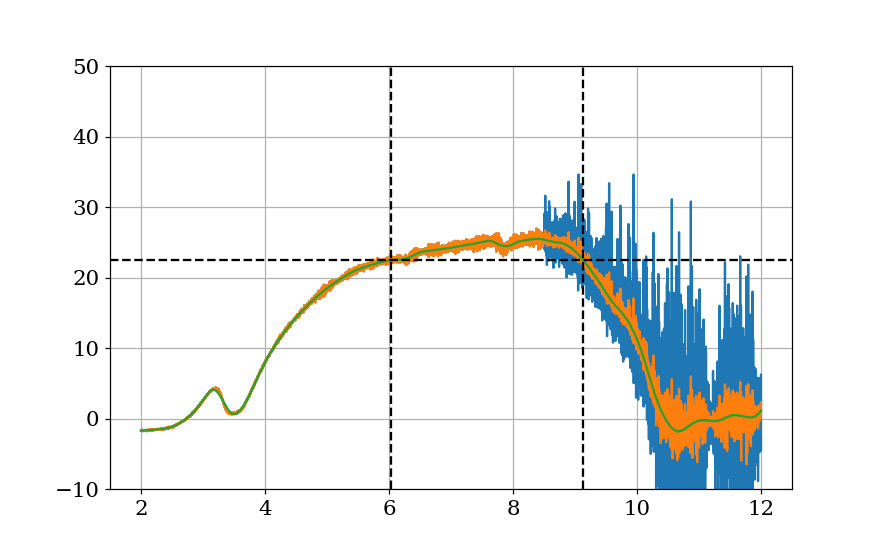

[3.094]


In [175]:
f    = mat['f'] 
data = mat['gainAll'][11,:]

plt.figure()
plt.plot(f,data)

#factor = vnautils.get_compensation_factor(f, data, 8.5, 0.5)
f, newdata, smoothed = vnautils.compensate_data(f, data, 8.5, 0.5)
plt.plot(f,newdata)
plt.plot(f, smoothed)

plt.ylim([-10, 50])
f1, f2 = vnautils.get_bandwidth(f, smoothed,3)

#plt.plot(f, thisdata)

plt.axhline(y=np.max(smoothed)-3, color='k', linestyle='--')
plt.axvline(x=f1, color='k', linestyle='--')
plt.axvline(x=f2, color='k', linestyle='--')
print(f2-f1)


In [176]:
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

from matplotlib import cm, colors
cmap   = plt.cm.turbo_r
cols   = get_colors(pows, cmap, 
                    vmin=np.min(pows), vmax=np.max(pows))
cols   = list(reversed(cols))

#cols   = dict(zip(reversed(pows), cols))

<IPython.core.display.Javascript object>


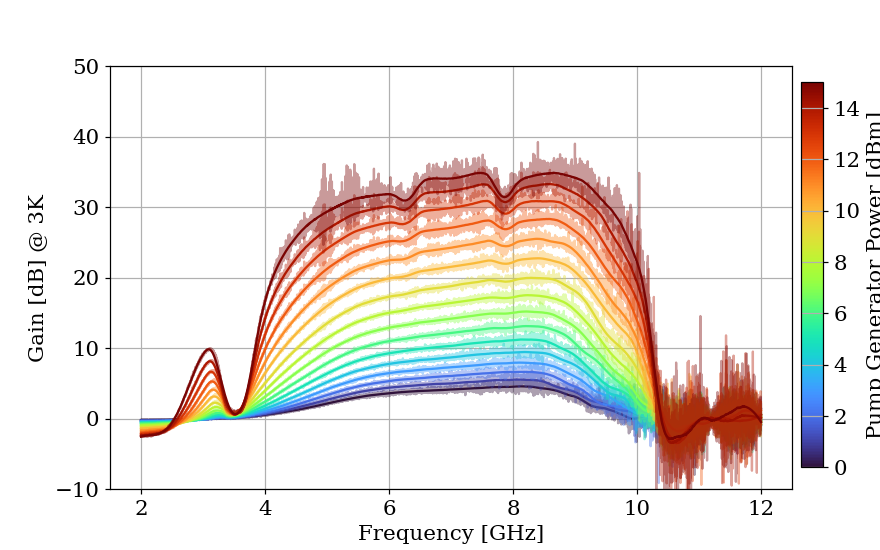

In [177]:
fig=plt.figure()

gains=list()
ripples = list()
for i in range(mat['gainSmoothedAll'].shape[0]):
        
    f, G, Gs = vnautils.compensate_data(mat['f'], mat['gainAll'][i,:], 8.5, 0.5)
    
    plt.plot(f, G, alpha=0.4, color=cols[i])
    plt.plot(f, Gs, color=plt.gca().lines[-1].get_color())
    
    gains.append(np.max(Gs))
    
    rstd, rmm = vnautils.estimate_ripple(f, G, 7, 0.5)
    
    ripples.append(rmm)
    
    
 
plt.ylim([-10, 50]) 
plt.xlabel('Frequency [GHz]')
plt.ylabel('Gain [dB] @ 3K')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.025, 0.7])
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(np.min(pows),                                                 
                                                     np.max(pows)), cmap=cmap.reversed()), cax=cbar_ax)
    
cbar_ax.set_ylabel('Pump Generator Power [dBm]')

for e in ['.pdf', '.svg']:
    plt.gcf().savefig(os.path.join(pathname,'global_gain_T3K'+e),
                      bbox_inches='tight', transparent=True)

In [178]:
ripples

[1.7509376749349843,
 1.3735304095626786,
 1.2862907540778963,
 1.365317039602159,
 1.6318575767044905,
 1.7665770552049125,
 1.360295606450462,
 1.611207094248817,
 1.2479960420122431,
 1.7343910369843094,
 1.8792492619032295,
 2.155253474769175,
 3.1579406158783208,
 3.4614558080541187,
 4.632220534043007,
 5.16831252173283]

<IPython.core.display.Javascript object>


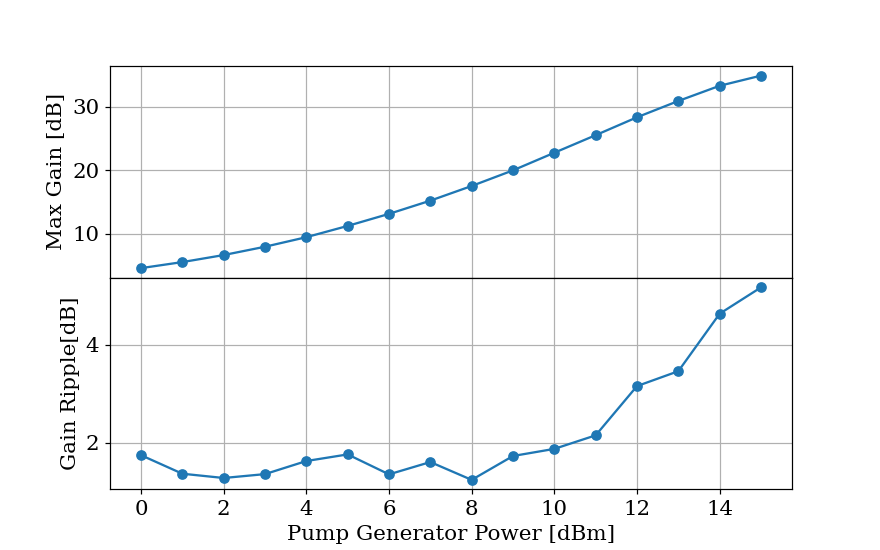

In [179]:
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].plot(pows,gains,marker='o')
ax[0].set_xlabel('Pump Generator Power [dBm]')
ax[0].set_ylabel('Max Gain [dB]')

ax[1].plot(pows,ripples,marker='o')
ax[1].set_xlabel('Pump Generator Power [dBm]')
ax[1].set_ylabel('Gain Ripple[dB]')


for e in ['.pdf', '.svg']:
    plt.gcf().savefig(os.path.join(pathname,'global_trend_3K'+e),
                      bbox_inches='tight', transparent=True)

# Gain at $T = 50\, mK$

In [183]:
pathname = '/home/giachero/gsbox/kids_rd/DARTWARS/data/KIT.v3/'
filename = '20240717_112545_gain_profile_pump_pow_sweep_50mK.mat'

mat=scipy.io.loadmat(os.path.join(pathname, filename))
pows=mat['pumpPows'][0]

/home/giachero/pvenv/dwenv3.10/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


<IPython.core.display.Javascript object>


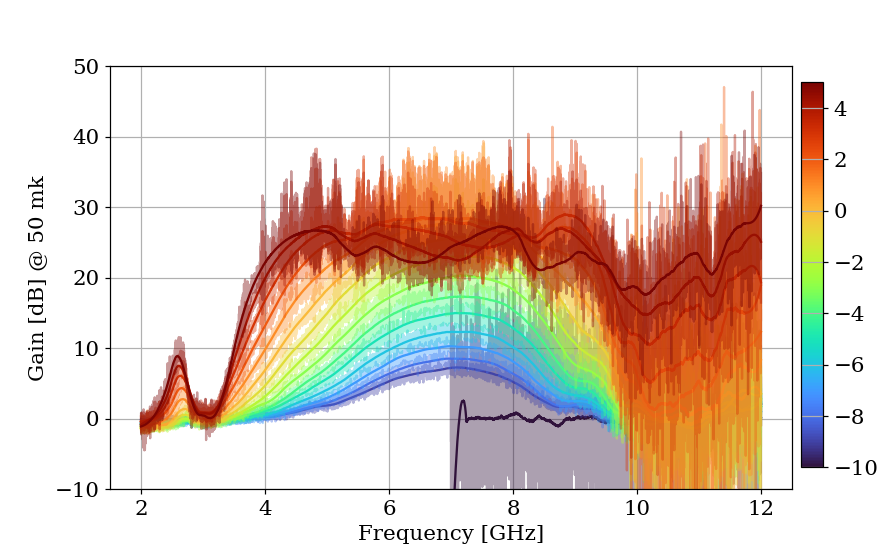

In [184]:
fig=plt.figure()

gains=list()
ripples = list()
for i in range(mat['gainSmoothedAll'].shape[0]):
        
    f, G, Gs = vnautils.compensate_data(mat['f'], mat['gainAll'][i,:], 8.5, 0.5)
    
    plt.plot(f, G, alpha=0.4, color=cols[i])
    plt.plot(f, Gs, color=plt.gca().lines[-1].get_color())
    
    gains.append(np.max(Gs))
    
    rstd, rmm = vnautils.estimate_ripple(f, G, 7, 0.5)
    
    ripples.append(rmm)
    
    
 
plt.ylim([-10, 50]) 
plt.xlabel('Frequency [GHz]')
plt.ylabel('Gain [dB] @ 50 mk')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.025, 0.7])
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(np.min(pows),                                                 
                                                     np.max(pows)), cmap=cmap.reversed()), cax=cbar_ax)
    
cbar_ax.set_ylabel('Pump Generator Power [dBm]')

for e in ['.pdf', '.svg']:
    plt.gcf().savefig(os.path.join(pathname,'global_gain_T50mK'+e),
                      bbox_inches='tight', transparent=True)

<IPython.core.display.Javascript object>


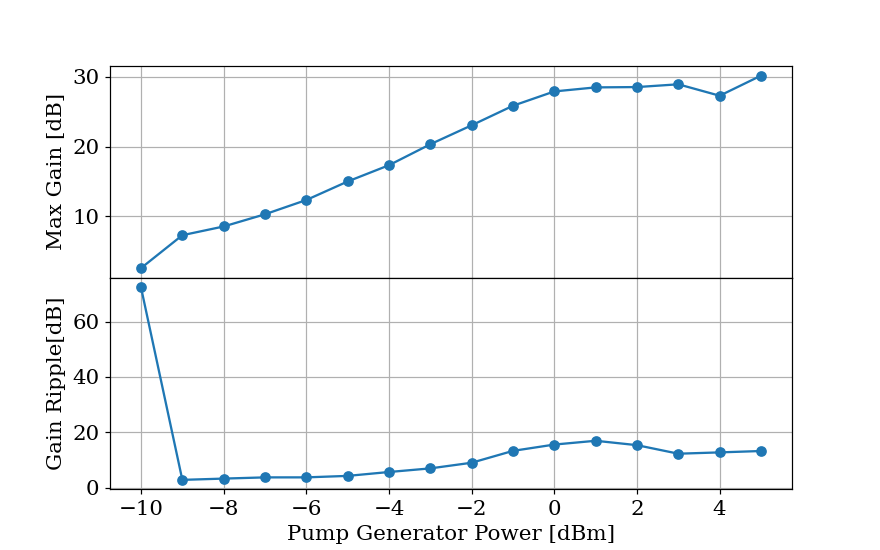

In [185]:
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=0, hspace=0)

ax[0].plot(pows,gains,marker='o')
ax[0].set_xlabel('Pump Generator Power [dBm]')
ax[0].set_ylabel('Max Gain [dB]')

ax[1].plot(pows,ripples,marker='o')
ax[1].set_xlabel('Pump Generator Power [dBm]')
ax[1].set_ylabel('Gain Ripple[dB]')


for e in ['.pdf', '.svg']:
    plt.gcf().savefig(os.path.join(pathname,'global_trend_50mK'+e),
                      bbox_inches='tight', transparent=True)

<IPython.core.display.Javascript object>


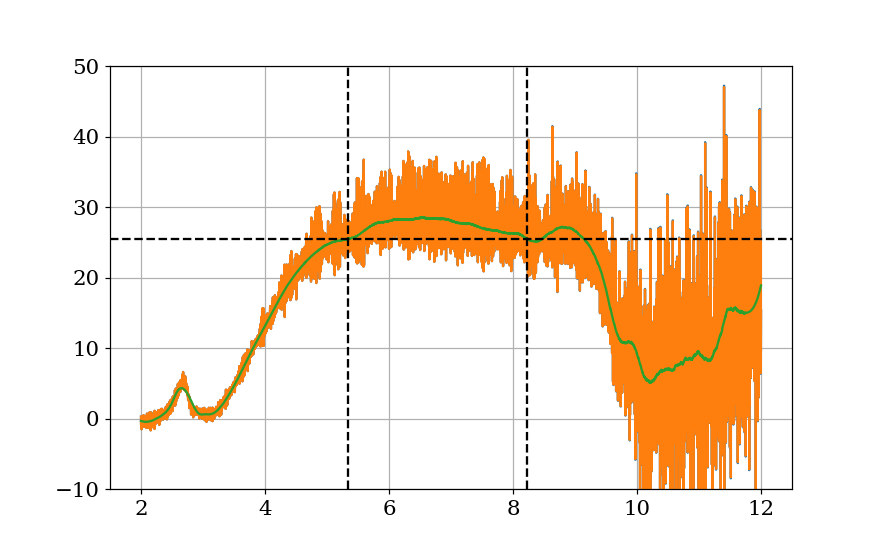

0.9494856919558402
[2.885]


In [196]:
f    = mat['f'] 
data = mat['gainAll'][12,:]

plt.figure()
plt.plot(f,data)

factor = vnautils.get_compensation_factor(f, data, 8.5, 0.5)
print(factor)
f, newdata, smoothed = vnautils.compensate_data(f, data, 8.5, 0.5)
plt.plot(f,newdata)
plt.plot(f, smoothed)

plt.ylim([-10, 50])
f1, f2 = vnautils.get_bandwidth(f, smoothed,3)

#plt.plot(f, thisdata)

plt.axhline(y=np.max(smoothed)-3, color='k', linestyle='--')
plt.axvline(x=f1, color='k', linestyle='--')
plt.axvline(x=f2, color='k', linestyle='--')
print(f2-f1)